In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

# Part 1

In [2]:
temps = data.sf_temps()

In [4]:
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
temps = temps.set_index(temps.date).sort_index().drop(columns='date')

In [9]:
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [10]:
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


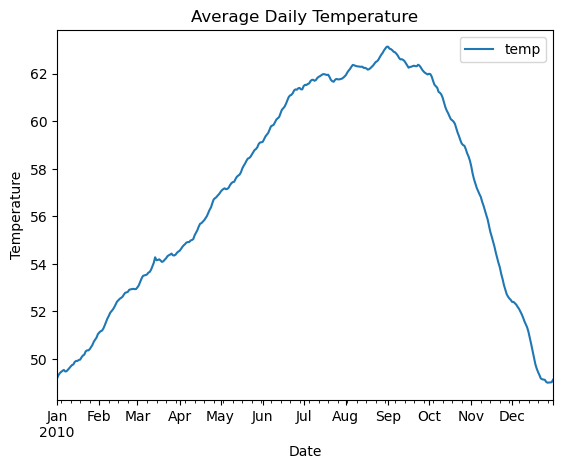

In [14]:
temps.resample('D').mean().plot()
plt.title('Average Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

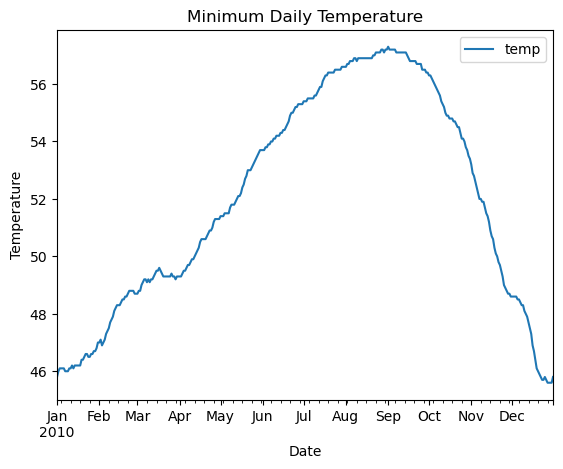

In [15]:
temps.resample('D').min().plot()
plt.title('Minimum Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

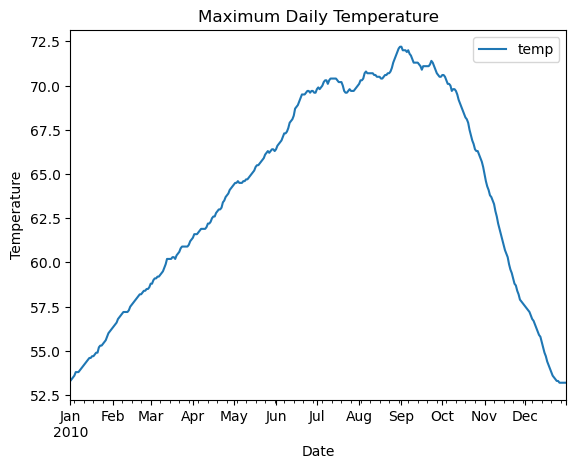

In [16]:
temps.resample('D').max().plot()
plt.title('Maximum Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 4. Which month is the coldest, on average?

In [22]:
temps.resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98414


#### January

### 5. Which month has the highest average temperature?

In [23]:
temps.resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.487083


#### September

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [38]:
daily_temps = temps.resample('D').agg(['min', 'max', 'mean'])

In [39]:
daily_temps.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [29]:
daily_temps.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [41]:
daily_temps['diff'] = daily_temps[('temp', 'min')] - daily_temps[('temp', 'max')]

In [42]:
daily_temps.head()

temp                  diff
             min   max       mean     
date                                  
2010-01-01  45.8  53.3  49.170833 -7.5
2010-01-02  46.0  53.4  49.304167 -7.4
2010-01-03  46.1  53.5  49.391667 -7.4
2010-01-04  46.1  53.6  49.445833 -7.5
2010-01-05  46.1  53.8  49.491667 -7.7

In [43]:
daily_temps.resample('M').mean().sort_values('diff').head(1)

temp                             diff
                  min        max       mean           
date                                                  
2010-09-30  56.903333  71.306667  62.487083 -14.403333

#### Which month has the highest daily temperature variability? September

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

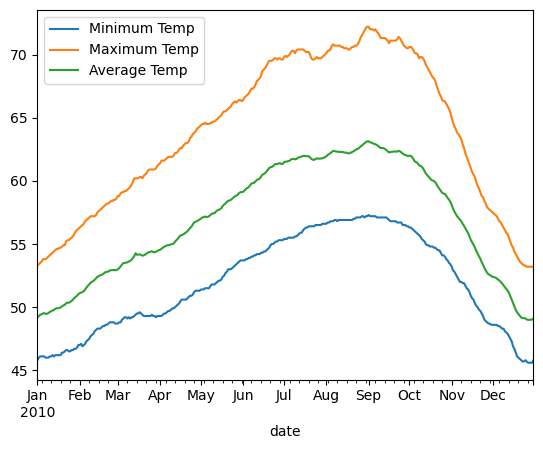

In [47]:
daily_temps[('temp', 'min')].plot(label='Minimum Temp')
daily_temps[('temp', 'max')].plot(label='Maximum Temp')
daily_temps[('temp', 'mean')].plot(label='Average Temp')
plt.legend()
plt.show()

# Part 2

In [48]:
seattle = data.seattle_weather()

In [49]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [52]:
seattle = seattle.set_index('date').sort_index()

In [53]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [74]:
seattle.groupby(
    [seattle.index.year, seattle.index.month]
    ).precipitation.sum().sort_values(ascending=False).head(1)

date  date
2015  12      284.5
Name: precipitation, dtype: float64

In [252]:
seattle.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

#### December 2015

### 2. Visualize the amount of monthly precipitation over time.

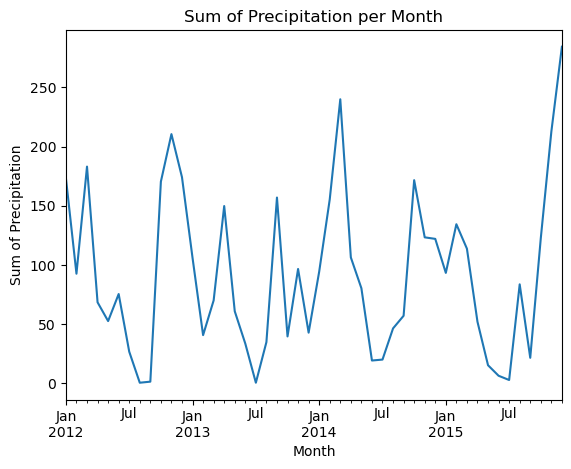

In [80]:
seattle.resample('M').precipitation.sum().plot()
plt.title('Sum of Precipitation per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Precipitation')
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

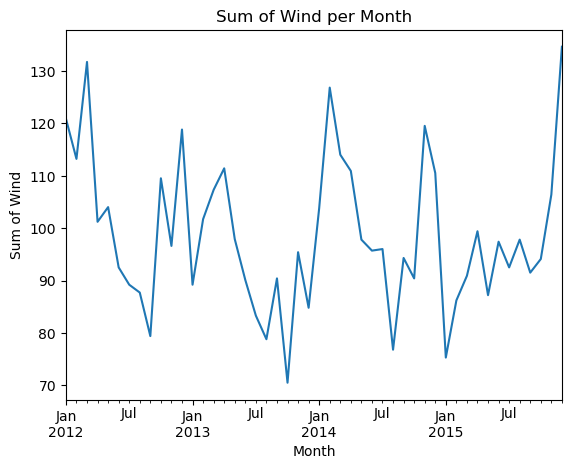

In [255]:
seattle.resample('M').wind.sum().plot()
plt.title('Sum of Wind per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Wind')
plt.show()

### 4. Which year-month combination is the windiest?

In [84]:
seattle.groupby(
    [seattle.index.year, seattle.index.month]
    ).wind.sum().sort_values(ascending=False).head(1)

date  date
2015  12      134.6
Name: wind, dtype: float64

#### December 2015

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [89]:
seattle.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [94]:
sunny = seattle[seattle.weather == 'sun']

In [99]:
sunny.groupby(sunny.index.year).count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012,118,118,118,118,118
2013,205,205,205,205,205
2014,211,211,211,211,211
2015,180,180,180,180,180


In [103]:
sunny.index.year.value_counts().sort_values().tail(1)

2014    211
Name: date, dtype: int64

#### 2014

### 6. In which month does it rain the most?

In [104]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [105]:
rainy = seattle[seattle.weather == 'rain']

In [262]:
rainy.resample('M').precipitation.sum().idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

#### November

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [110]:
precip = seattle[seattle.precipitation != 0]

In [113]:
precip.index.month.value_counts().sort_values().tail(1)

12    81
Name: date, dtype: int64

#### December

# Part 3

In [114]:
flights = data.flights_20k()

In [117]:
flights = flights.set_index('date').sort_index()

In [118]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 1. Convert any negative delays to 0.

In [126]:
flights.delay = flights.delay.clip(lower=0)

In [127]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

In [134]:
flights.groupby(flights.index.hour).delay.mean().sort_values().tail(1)

date
3    302.5
Name: delay, dtype: float64

#### 0300

### 3. Does the day of the week make a difference in the delay amount?

In [143]:
flights.groupby(flights.index.day_name()).delay.mean().sort_values(ascending=False)

date
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

#### Flights on Fridays are delayed over twice as long as fights on Mondays or Tuesdays on average

### 4. Does the month make a difference in the delay amount?

In [147]:
flights.index.month.value_counts()

3    6960
1    6784
2    6256
Name: date, dtype: int64

In [144]:
flights.groupby(flights.index.month_name()).delay.mean().sort_values(ascending=False)

date
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

#### Of the three months in the dataset, February has the longest delays

# Part 4 (bonus)

In [154]:
electricity = data.iowa_electricity()

In [155]:
electricity.dtypes

year              datetime64[ns]
source                    object
net_generation             int64
dtype: object

In [156]:
electricity = electricity.set_index('year').sort_index()

In [157]:
electricity.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


### 1. For each row, calculate the percentage of the year's total that energy source provided.

In [163]:
electricity.groupby(electricity.index.year).net_generation.sum()

year
2001    40651
2002    42528
2003    42107
2004    43236
2005    44145
2006    45473
2007    49778
2008    53086
2009    51859
2010    57509
2011    56371
2012    56675
2013    56670
2014    56854
2015    56653
2016    54381
2017    56476
Name: net_generation, dtype: int64

In [171]:
electricity.resample('Y').net_generation.sum()

year
2001-12-31    40651
2002-12-31    42528
2003-12-31    42107
2004-12-31    43236
2005-12-31    44145
2006-12-31    45473
2007-12-31    49778
2008-12-31    53086
2009-12-31    51859
2010-12-31    57509
2011-12-31    56371
2012-12-31    56675
2013-12-31    56670
2014-12-31    56854
2015-12-31    56653
2016-12-31    54381
2017-12-31    56476
Freq: A-DEC, Name: net_generation, dtype: int64

In [172]:
electricity['year_total'] = electricity.resample('Y').net_generation.transform('sum')

In [173]:
electricity.head()

,source,net_generation,year_total
year,,,
2001-01-01,Fossil Fuels,35361,40651
2001-01-01,Nuclear Energy,3853,40651
2001-01-01,Renewables,1437,40651
2002-01-01,Fossil Fuels,35991,42528
2002-01-01,Nuclear Energy,4574,42528


In [174]:
electricity['year_percent'] = (electricity.net_generation / electricity.year_total) * 100

In [175]:
electricity.head()

,source,net_generation,year_total,year_percent
year,,,,
2001-01-01,Fossil Fuels,35361,40651,86.986790
2001-01-01,Nuclear Energy,3853,40651,9.478242
2001-01-01,Renewables,1437,40651,3.534968
2002-01-01,Fossil Fuels,35991,42528,84.628950
2002-01-01,Nuclear Energy,4574,42528,10.755267


### 2. Lineplot of generation over time, color by source

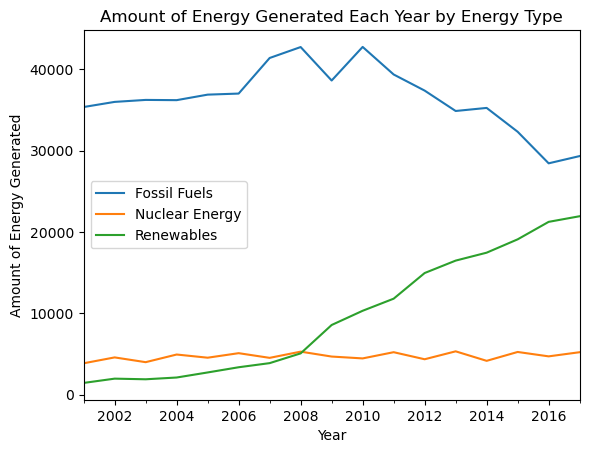

In [182]:
electricity[electricity.source == 'Fossil Fuels'
           ].net_generation.plot(label = 'Fossil Fuels')
electricity[electricity.source == 'Nuclear Energy'
           ].net_generation.plot(label = 'Nuclear Energy')
electricity[electricity.source == 'Renewables'
           ].net_generation.plot(label = 'Renewables')
plt.title('Amount of Energy Generated Each Year by Energy Type')
plt.xlabel('Year')
plt.ylabel('Amount of Energy Generated')
plt.legend()
plt.show()

### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [190]:
electricity.drop(columns='year_total').pivot_table(
    index='source', columns=electricity.index.year)

net_generation                                            \
year                     2001   2002   2003   2004   2005   2006   2007   
source                                                                    
Fossil Fuels            35361  35991  36234  36205  36883  37014  41389   
Nuclear Energy           3853   4574   3988   4929   4538   5095   4519   
Renewables               1437   1963   1885   2102   2724   3364   3870   

                                     ... year_percent                        \
year             2008   2009   2010  ...         2008       2009       2010   
source                               ...                                      
Fossil Fuels    42734  38620  42750  ...    80.499567  74.471162  74.336191   
Nuclear Energy   5282   4679   4451  ...     9.949893   9.022542   7.739658   
Renewables       5070   8560  10308  ...     9.550541  16.506296  17.924151   

                                                                       \
year                 2011       2012       2013       2014       2015   
source                                                                  
Fossil Fuels    69.824910  65.953242  61.536968  62.000915  57.047288   
Nuclear Energy   9.251211   7.670049   9.389448   7.302916   9.254585   
Renewables      20.923879  26.376709  29.073584  30.696169  33.698127   

                                      
year                 2016       2017  
source                                
Fossil Fuels    52.292161  51.931794  
Nuclear Energy   8.648241   9.232240  
Renewables      39.059598  38.835966  

[3 rows x 34 columns]

### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [194]:
electricity['cumulative'] = electricity.groupby(
    'source').net_generation.transform('cumsum')

In [195]:
electricity.head()

,source,net_generation,year_total,year_percent,cumulative
year,,,,,
2001-01-01,Fossil Fuels,35361,40651,86.986790,35361
2001-01-01,Nuclear Energy,3853,40651,9.478242,3853
2001-01-01,Renewables,1437,40651,3.534968,1437
2002-01-01,Fossil Fuels,35991,42528,84.628950,71352
2002-01-01,Nuclear Energy,4574,42528,10.755267,8427


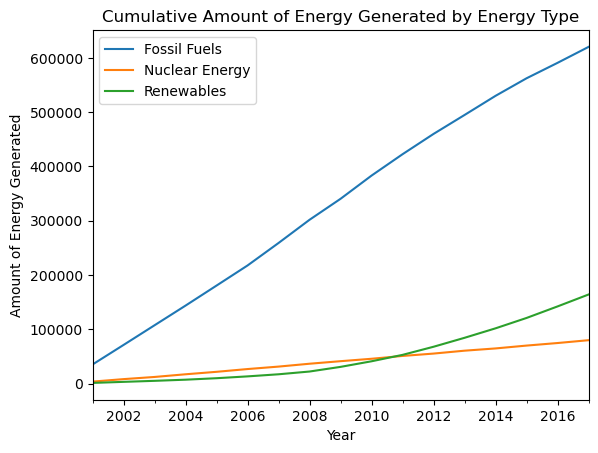

In [196]:
electricity[electricity.source == 'Fossil Fuels'
           ].cumulative.plot(label = 'Fossil Fuels')
electricity[electricity.source == 'Nuclear Energy'
           ].cumulative.plot(label = 'Nuclear Energy')
electricity[electricity.source == 'Renewables'
           ].cumulative.plot(label = 'Renewables')
plt.title('Cumulative Amount of Energy Generated by Energy Type')
plt.xlabel('Year')
plt.ylabel('Amount of Energy Generated')
plt.legend()
plt.show()

### 5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

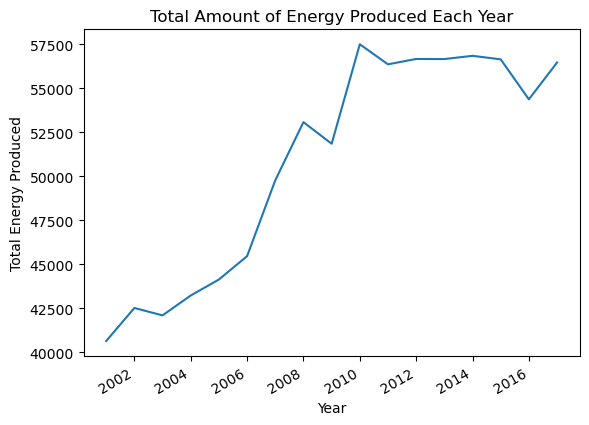

In [200]:
electricity.year_total.plot()
plt.title('Total Amount of Energy Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Produced')
plt.show()

#### I don't fully understand the question

# Part 5 (bonus)

### 1. Use the sf_temps dataset

In [202]:
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [238]:
daily_temps = temps.resample('D').mean()

In [239]:
daily_temps

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [240]:
daily_temps['category'] = pd.cut(daily_temps.temp, 4,
                                 labels=['cold', 'cool', 'warm', 'hot'])

In [241]:
daily_temps.head()

,temp,category
date,,
2010-01-01,49.170833,cold
2010-01-02,49.304167,cold
2010-01-03,49.391667,cold
2010-01-04,49.445833,cold
2010-01-05,49.491667,cold


In [242]:
daily_temps.category.value_counts()

hot     138
cool     82
cold     79
warm     66
Name: category, dtype: int64

### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [243]:
daily_temps.resample('M').category.value_counts()

date            
2010-01-31  cold    31
            cool     0
            warm     0
            hot      0
2010-02-28  cold    16
            cool    12
            warm     0
            hot      0
2010-03-31  cool    31
            cold     0
            warm     0
            hot      0
2010-04-30  cool    21
            warm     9
            cold     0
            hot      0
2010-05-31  warm    31
            cold     0
            cool     0
            hot      0
2010-06-30  hot     25
            warm     5
            cold     0
            cool     0
2010-07-31  hot     31
            cold     0
            cool     0
            warm     0
2010-08-31  hot     31
            cold     0
            cool     0
            warm     0
2010-09-30  hot     30
            cold     0
            cool     0
            warm     0
2010-10-31  hot     21
            warm    10
            cold     0
            cool     0
2010-11-30  cool    18
            warm    11
            cold 

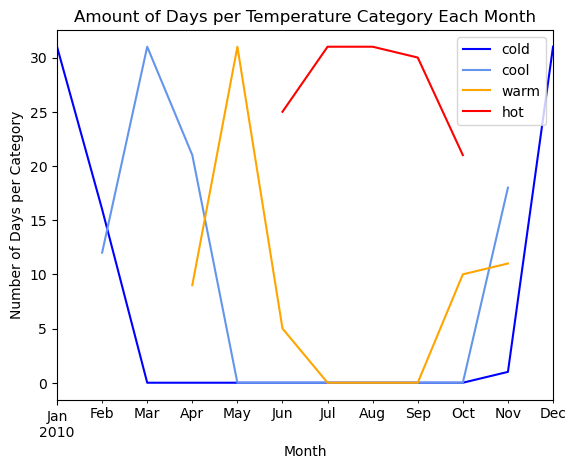

In [244]:
daily_temps[daily_temps.category == 'cold'].resample(
    'M').category.count().plot(label='cold', color='blue')
daily_temps[daily_temps.category == 'cool'].resample(
    'M').category.count().plot(label='cool', color='cornflowerblue')
daily_temps[daily_temps.category == 'warm'].resample(
    'M').category.count().plot(label='warm', color='orange')
daily_temps[daily_temps.category == 'hot'].resample(
    'M').category.count().plot(label='hot', color='red')
plt.title('Amount of Days per Temperature Category Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Days per Category')
plt.legend()
plt.show()

### 4. Create pretty labels for time plots

#### mmkay

### 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [251]:
plt.bar(data=daily_temps, x='month', y=daily_temps.category.count(),
           hue='category')

TypeError: bar() missing 1 required positional argument: 'height'